# <center>Project: Writing a Data Science Blog Post</center>
# <center>How Can You Predict Airbnb's Listings in Seattle, Washington? </center>

In [1]:
from IPython import display

In [2]:
![](Airbnb_Logo_Bélo.svg (1).png),![](Udacity_logo(1).png)

'[]' is not recognized as an internal or external command,
operable program or batch file.


## OVERVIEW

>This project aims to demonstrate my technical skills and show my ability to deliver the results to the audience in an effective way. The Jupyter Notebook will include all the code needed to solve the desired problem using the **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (**CRISP-DM**). It will be published on my **GitHub** repository. In addition, I will post a blog on **Medium** to demonstrate my findings.

## INTRODUCTION

Finding the right place to stay in **Seattle** might be a hastle for a lot of people when visiting, and pricing plays a big role in the booking process. In this Analysis, I will try answering three main questions as shown below: 
* 1- Can seasonality increase prices?
* 2- What are the main factors that effect prices?
* 3- Is there any certain ameneties people look for? 

Before we start the analysis, let us go over an important topic, how pricing works in **Airbnb**? 
According to their [website](https://www.airbnb.com/help/article/125/how-pricing-works?locale=en), the final price can be broken into three types as listed below: 
* 1- **Airbnb**: "Guest service fee charged by Airbnb—this provides 24/7 community support and helps everything run ensure the system runs smoothly."
* 2- **Host**: Nightly rate, Cleaning, fee, and Extra guest fee.
* 3- **Other**: Currency exchange fee, VAT, and other local taxes required in certain countries/cities. 

## DATA COLLECTION

The dataset is publicly accessible and was collected from **Kaggle**, it has 3 different CSV files originaly generated from **Airbnb** and each file has its unique information. Below are descriptions for each file: 
* 1- **listings.csv**: The file has the property's location, host info, guest fees, cleaning fees, ameneties and other features.
* 2- **calender.csv**: The file has the property's listing ID, price, and availability. 
* 3- **reviews.csv**:  This file has the reviews on the properties listed, **but it will not be used in the this analysis**.

For further information about the dataset, you can click on this [link](https://www.kaggle.com/airbnb/seattle).  

## EXPLARATORY DATA ANALYSIS (EDA)
> This section is **important**, we will go over each file seperatley; then merge them into one dataframe.

But first, let us import the libraries needed in the analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline

### 1- listings.csv

In [4]:
# Reading the dataset
listings = pd.read_csv("listings.csv")

# Always, befor you start working on the data, check the first rows to have a better understanding of its structure
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# Checking the features provided in the dataset
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

> As shown above, the dataset has **92** different features (columns). 

#### What is the number of listings and hosts?

In [6]:
listings_id = listings["id"].count()
hosts_id = len(listings["host_id"].unique())
print("Number of listings:", listings_id)
print("Number of hosts:", hosts_id)

Number of listings: 3818
Number of hosts: 2751


> According to the **listings.csv** dataset, there are **3818** properties listed by **2751** hosts.

#### Showing the percentage of missing values in each feature (column)

In [7]:
listings_null = listings.isnull().mean()*100
listings_null_cols = listings_null[listings_null > 0]
listings_null_cols.sort_values(ascending = False)

license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
last_review                     16.422211
first_review                    16.422211
reviews_per_month               16.422211
space                           14.903091
host_response_rate              13.698271
host_response_time              13

In [8]:
len(listings_null_cols)

45

> As we can see, out of the total number of columns we have (92), 45 of them have missing values. We have no values at all in column "license", around 98% of the data in the "square_feet" column iare missing, and so on. Thus, we will drop a huge amount of them once we strat building the models to avoid overfitting. 


After doing some analysis on the **listings.csv** file, let's go over the **calendar.csv** file and do the same.

### 2. calendar.csv

In [9]:
# Reading the dataset
calendar = pd.read_csv("calendar.csv")

# Always, befor you start working on the data, check the first rows to have a better understanding of its structure
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [10]:
# Checking the features provided in the dataset
calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

> As shown above, the dataset has **4** different features (columns). 

#### Showing the percentage of missing values in each feature (column)

In [11]:
calendar_null = calendar.isnull().mean()*100
calendar_null_cols = calendar_null[calendar_null > 0]
calendar_null_cols.sort_values(ascending = False)

price    32.938998
dtype: float64

> As shown above, we only have missing values in the **"price"** column

###### Checking the unique valaues in the **"available"** feature (column)

In [12]:
calendar["available"].unique()

array(['t', 'f'], dtype=object)

> As shown, we have two values only: True and False

It looks like that there is some sort of a trend in the **"available"** column, whenever the value is "f", we get NaN values. Let's check this out.

In [13]:
# Check if the percentage of the value "f" is equal to the percentage in the missing column of "price"
f_percentage = len(calendar[calendar["available"]=="f"])/len(calendar["available"])
f_rounded = round(f_percentage,9)*100
f_rounded

32.9389984

> **Exactly what we expected, the percentage is identical. Thus, we came into conclusion that whenever we have "f" in the available column, we get a null value in the price column.**

To double check, let's print a dataframe with both values.

In [14]:
calendar[calendar["available"]=="f"]

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [15]:
calendar[calendar["available"]=="t"]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


#### What is the total number of observations in the dataset?

In [16]:
num_rows = calendar.shape[0]
print("The dataset has %d rows"%(num_rows))

The dataset has 1393570 rows


#### What is the time frame of the dataset?

In [17]:
first_day = calendar["date"].min()
last_day = calendar["date"].max()
print("The first day in the dataset is:",first_day)
print("The last day in the dataset is:",last_day)

The first day in the dataset is: 2016-01-04
The last day in the dataset is: 2017-01-02


The first day is April 1st, 2016, and the last day is February 1st 2017.

### 3. Merging Files

To make further analysis, I will merge the **listings.csv** and the **calendar.csv** files. However, several steps will be done before the merge.

#### 3.1 Important Features
I will create two **lists**, one for each file, which will contain only necessary features/columns

In [18]:
listings_cols = listings[['id', 'price', 'weekly_price', 'monthly_price', 'street', 'neighbourhood'
                              , 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city'
                              , 'state', 'zipcode', 'market', 'smart_location', 'property_type', 'room_type'
                              , 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet'
                             ]]

# Checking the shape of the selected features
print(listings_cols.shape)

(3818, 22)


Getting the dates and changing it into integers

In [19]:
def month_date(row):
    return int(row['date'].split('-')[1])
def year_date(row):
    return int(row['date'].split('-')[0])
def host_year(row):
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since
def val_list(row, column_name, value):
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val


Splitig lists into columns

In [20]:
def list_to_columns(df, column_name, max_dummies_num = 10):
    values_dict = {}
    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: val_list(row, column_name, value[0]),axis=1)
        
    return

Fees on extra people (extra_people) column

In [21]:
def get_extra_people_fee(row):
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

Dataset cleaning and merging

In [22]:
def clean_dataset(listings_df, calendar_df):
    listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})
    df = pd.merge(calendar_df, listings_df, on = 'listing_id')
    doppred_columns = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    df = df.drop(columns = doppred_columns)    
    df['month'] = df.apply(lambda row: month_date(row),axis=1)
    df['year'] = df.apply(lambda row: year_date(row),axis=1)
    df = df.drop(columns = ['date'])
    
    df = df.dropna(subset=['price_x'])
    
    df['price'] = df['price_x'].astype(str)
    df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
    df = df.drop(columns = ['price_x'])
    
    df['host_since_year'] = df.apply(lambda row: host_year(row),axis=1)
    df['host_since_year'].fillna(df['host_since_year'].mean(), inplace = True)
    df = df.drop(columns = ['host_since'])
    
    df['host_response_rate_num'] = df['host_response_rate'].astype(str)
    df['host_response_rate_num'] = df['host_response_rate_num'].str.replace("%", "").astype("float")
    df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(), inplace = True)
    
    df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
    
    df = df.drop(columns = ['host_response_rate', 'host_response_rate_num'])
    
    df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    
    list_to_columns(df, 'host_verifications')
    df = df.drop(columns = ['host_verifications'])
    
    df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
    df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
    df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    
    list_to_columns(df, 'amenities')
    df = df.drop(columns = ['amenities'])
    
    df['extra_people_fee'] = df.apply(lambda row: get_extra_people_fee(row),axis=1)
    df = df.drop(columns = ['extra_people'])
    
    review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
    for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)
    
    return df

In [23]:
df = clean_dataset(listings, calendar)

C:\Users\NAALRA~1\AppData\Local\Temp/ipykernel_31200/1518850303.py:24: FutureWarning:

The default value of regex will change from True to False in a future version.



Checking the range of prices in the listings

In [24]:
minimum_price = df['price'].min()
maximum_price = df['price'].max()
average_price = df['price'].mean()
print('Minimum price per listing is %d$.' % (minimum_price))
print('Maximum price per listing is %d$' % (maximum_price))
print('Average price per listing is %d$.' % (average_price))

Minimum price per listing is 10$.
Maximum price per listing is 1650$
Average price per listing is 137$.


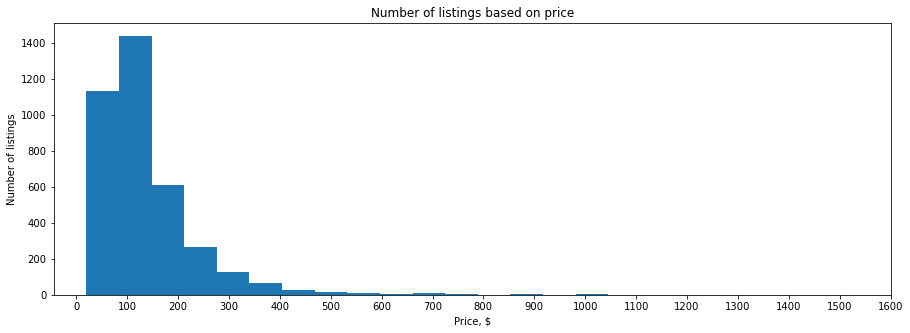

In [25]:
#get the average price for each listing
avg_price_listing = df.groupby('listing_id').mean()['price']

#plot
plt.figure(figsize=(15,5))
plt.hist(avg_price_listing, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings based on price')


plt.savefig('Price distrubution.png')

plt.show()

Plotting the number of listing in each month during 2016

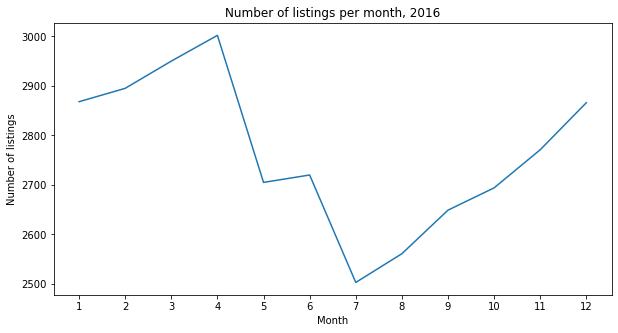

In [26]:
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(df[(df['month'] == i) & (df['year'] == 2016)]['listing_id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')

plt.savefig('number of available listings.png')

plt.show()

Plotting the average price per month in 2016

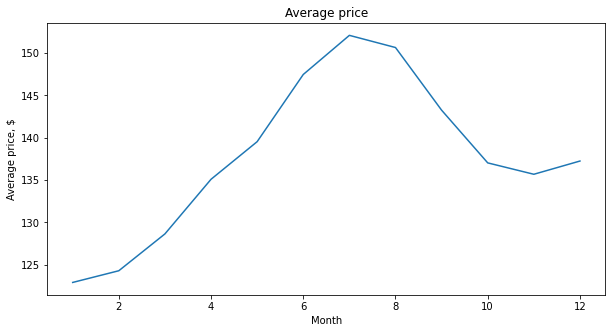

In [27]:
avg_price_by_month = df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(avg_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.savefig('average_price_month')

plt.show()


Prices Based on Neighbourhoods

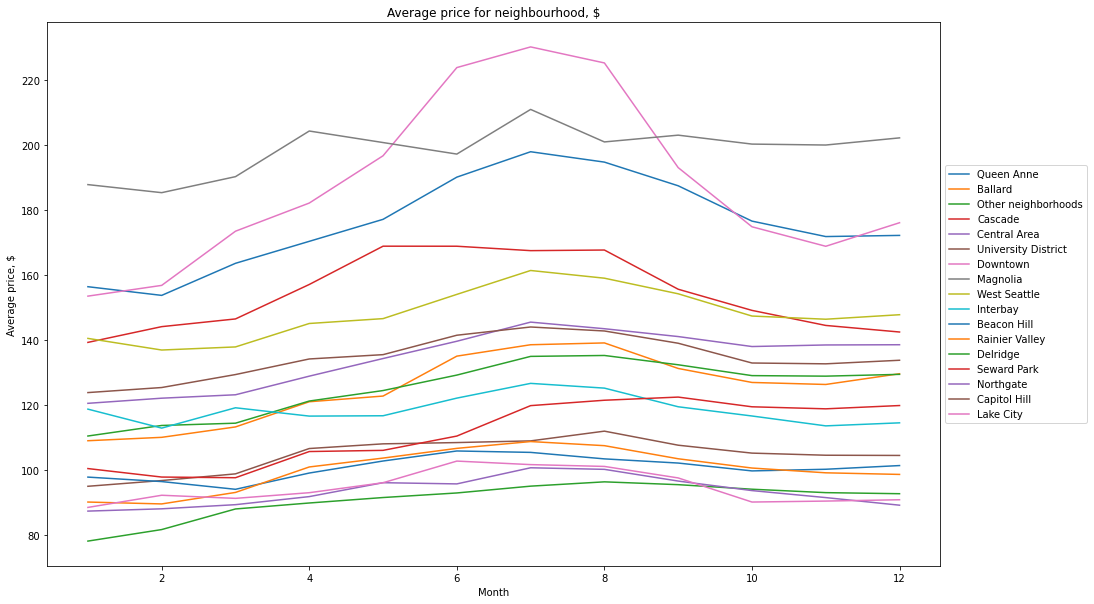

In [28]:
neighbourhoods = df['neighbourhood_group_cleansed'].unique()


price_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_month_neighbourhood[price_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_month_neighbourhood[price_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')

plt.savefig('average price for neighbourhood')

plt.show()

Correlation between price and different features/columns 

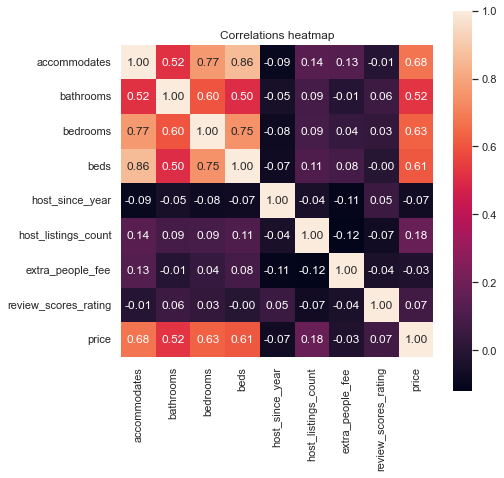

In [29]:
#Numerical columns to find out correlation
cols = ['accommodates','bathrooms','bedrooms','beds','host_since_year',
        'host_listings_count', 'extra_people_fee',
        'review_scores_rating', 'price']

#Find out correlation between columns and plot
corr = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

## Machine Learning

Random Forest regressor and XGBoost regressor

Turning Categorical Features Into Dummies

In [32]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)
    
for col in  categorical_cols:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',

                                                         drop_first=True, dummy_na=True)], axis=1)
df = df.drop(columns = ['listing_id', 'year'])

Train and test datasets

In [33]:
test_size = 0.3
random_state = 42

X = df.drop(columns = 'price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

### Train Random Forest Regressor

In [35]:
random_forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=random_state, 
                               n_jobs=-1)
random_forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = random_forest.predict(X_train)
y_test_preds = random_forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

C:\Users\naalrasheed\ml_projects\env\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Random Forest MSE train: 186.973, test: 211.258
Random Forest R^2 train: 0.983, test: 0.981


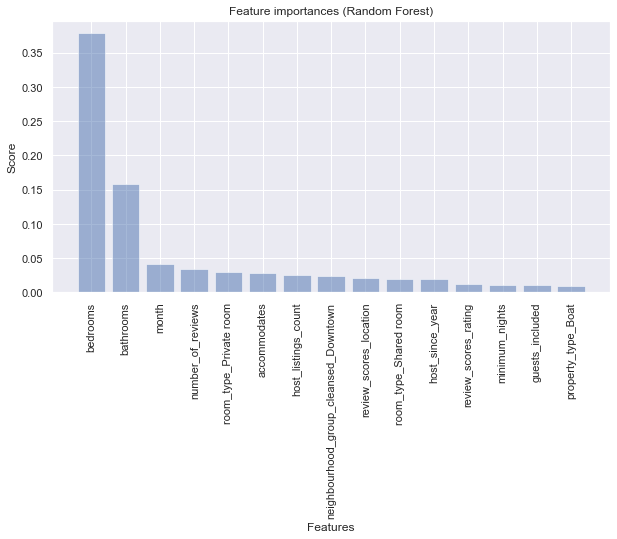

In [36]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, random_forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

### Train XGBoost Regressor

In [37]:
xgboost = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgboost.fit(X_train,y_train)


y_train_preds = xgboost.predict(X_train)
y_test_preds = xgboost.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

MSE train: 892.523, test: 899.079
R^2 train: 0.920, test: 0.917


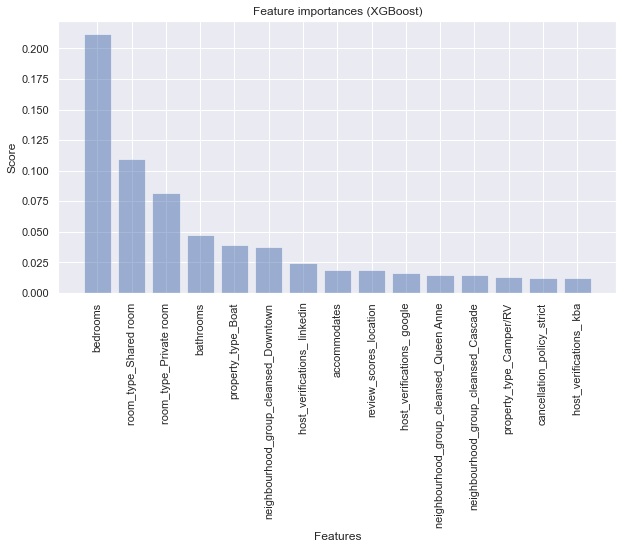

In [38]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgboost.feature_importances_), key=lambda x: x[1] * -1)
xgboost_feature_importances = pd.DataFrame(values, columns = headers)

features = xgboost_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = xgboost_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (XGBoost)')

plt.savefig('feature importances XGB.png')
 
plt.show()